In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from Methods.costs import * 
from Methods.least_squares import * 
from Methods.ridge import *
from Methods.cross_validation import *
from Methods.split_data import *
from Methods.scaling_standardization import *
from Methods.build_polynomial import *

%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [3]:
from Methods.proj1_helpers import *
DATA_TRAIN_PATH = 'csv/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
tX_tra = tX.T
#conc = np.column_stack((y, tX))
#conc_filtered = conc[~(conc == -999).any(1)]
#y = conc_filtered[:,0]
#tX = conc_filtered[:,1:]

## Do your thing crazy machine learning thing here :) ...

# Raw Data Analysis 

### Visualisation of the data

(250000, 30)
[[ 138.47    51.655   97.827 ...,    1.24    -2.475  113.497]
 [ 160.937   68.768  103.235 ..., -999.    -999.      46.226]
 [-999.     162.172  125.953 ..., -999.    -999.      44.251]
 ..., 
 [ 105.457   60.526   75.839 ..., -999.    -999.      41.992]
 [  94.951   19.362   68.812 ..., -999.    -999.       0.   ]
 [-999.      72.756   70.831 ..., -999.    -999.       0.   ]]


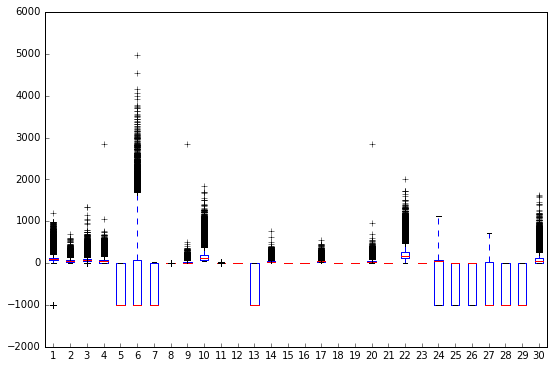

In [18]:
#Boxplot of the Raw Data
print(np.shape(tX))
print(tX)
boxplot(tX, -2000, 6000, 'boxplot_original')

## Scatter plots

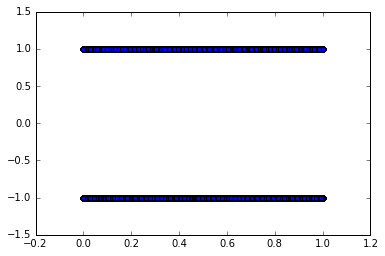

In [11]:
res = np.column_stack((y, tX[:,12])) # Change with tX[:,i] to plot y against the ith col of tX
res_filt = res[res[:,1] != -999]
plt.scatter(res_filt[:,1], res_filt[:,0])
plt.show()

## Correlations (not useful?)

In [12]:
for i,col in zip(range(tX.T.shape[0]),tX.T):
    vec = np.column_stack((y,col))
    #vec_filtered = vec[vec[:,1] > -998]
    print(i, np.corrcoef(vec.T)[0,1])

0 0.239149057892
1 -0.351427955862
2 -0.0140552737849
3 0.192526328569
4 0.141645992566
5 0.191766088075
6 0.140554400465
7 0.0122454812855
8 -0.0152874266878
9 0.153235932476
10 -0.195397896183
11 0.271751877052
12 0.141345988596
13 0.235237975878
14 -0.000943251058212
15 -0.00440253868639
16 -0.0319475868053
17 0.00151623537706
18 0.00412544741152
19 0.0224657515108
20 0.00747534218859
21 0.135520261523
22 0.133549123082
23 0.157604145676
24 0.15046926005
25 0.150468037793
26 0.14071436695
27 0.141264913776
28 0.141255686505
29 0.134295726669


# Feature Processing

## Data scaling 

In [ ]:
minima_tX = data_scaling(tX.T)

##### Boxplot of the scale data

In [ ]:
boxplot(minima_tX, -0.5, 1.5, 'boxplot_scaled')

## Data standardization

In [ ]:
std_tX = data_standardization(tX.T)

##### Boxplot of the Standardized data

In [3]:
boxplot(std_tX, -7, 7, 'boxplot_standardized')

NameError: name 'std_tX' is not defined

## Feature Deletion

## Replace Undefined variables by mean of all the other variables

## Polynomial Transformation

### Polynome

### Squared

In [9]:
tx_squares = build_poly_matrix(tX, 2)

### Sqrt

## Other Transformations

### Log

### Other? 

## Model Selection

### Least Squares

In [ ]:
mse, w = least_squares(y, tX)
print(w)
print(mse)

### Ridge Regression

In [13]:
w = ridge_regression(y, tX, 1)
print(w)

[  2.60587944e-04  -9.09041953e-03  -2.05593759e-03  -2.07372712e-03
   4.16112294e-04   5.56555764e-04  -8.63582277e-03   1.49220972e-02
   8.84108509e-05   3.01001515e-03  -1.36439197e-02   2.91963352e-02
   5.90347247e-03   6.34020163e-03  -2.47827750e-04  -1.03790696e-03
   2.15291139e-03  -3.16656538e-04   7.13755800e-04   4.85803562e-03
   3.40155651e-04  -7.69669008e-04  -1.27454270e-02   1.51646839e-03
  -7.80900128e-04  -5.87028123e-04   3.16780195e-04   1.29177964e-03
   3.04952725e-04  -5.48271055e-03]


### Least squares Gradient Descent

### Least squares Stochastique Gradient Descent

### Logistic regression

### Reg logistic regression

## Verification

### Cross Validation

In [7]:
#Data split for the tests
x_tr, y_tr, x_te, y_te = split_data(x, y, ratio=3, seed=1)

NameError: name 'x' is not defined

###  Bias-Variance decomposition

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = 'csv/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = 'csv/sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)